In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import importlib
import sys
import os

#distance
import gower

# custom libraries
sys.path.append(os.path.abspath(os.path.join('..','scripts')))
import utils
importlib.reload(utils)
import preprocessing
importlib.reload(preprocessing)

sns.set_palette('Set2')

In [5]:
df = preprocessing.load_dataset(categ= False, scaler=False)
distance_matrix = gower.gower_matrix(df)

In [18]:
# ranges for epsilon and min_samples
epsilons = np.arange(0.01, 0.05, 0.002)
min_samples_s = np.arange(3, 90, 3)

# Matrices to store the number of clusters and silhouette scores
num_clusters = np.zeros((len(epsilons), len(min_samples_s)), dtype=int)
silhouettes = np.zeros((len(epsilons), len(min_samples_s)), dtype=float)

# Gridsearch for epsilon and min_samples
for i, epsilon in enumerate(epsilons):
    for j, min_samples in enumerate(min_samples_s):
        dbscan = DBSCAN(eps=epsilon, min_samples=min_samples, metric='precomputed')
        labels = dbscan.fit_predict(distance_matrix)
        
        # save # of clusters (excluding noise points)
        num_clusters[i, j] = len(set(labels)) - (1 if -1 in labels else 0)
        
        # Calculate silhouette score
        if len(set(labels)) > 1:
            silhouettes[i, j] = silhouette_score(distance_matrix, 
                                                 labels, 
                                                 metric='precomputed')
        else:
            silhouettes[i, j] = -1 
            # -1 placeholder if silhouette can't be computed


Number of clusters:
 [[69 33 25 22 18 14 14 13 11 11 11 10 10  9  9  7  6  6  6  6  5  5  3  3
   3  3  3  3  3]
 [64 35 28 23 22 21 15 14 13 13 13 12 11 11 10 10  9  9  9  9  9  7  6  6
   6  6  6  5  5]
 [67 39 30 25 22 21 20 17 16 14 13 13 13 12 11 11 11 10  9  9  9  9  9  9
   8  8  8  7  6]
 [77 41 34 25 24 22 21 20 18 17 15 15 14 13 12 11 11 11 11 11  9  9  9  9
   9  9  9  9  8]
 [76 43 35 27 24 24 22 22 20 19 17 16 15 14 14 12 12 12 11 11 11 11 10  9
   9  9  9  9  9]
 [74 45 36 33 24 24 22 22 21 19 17 17 17 15 14 14 13 12 12 12 11 11 11 10
  10 10  9  9  9]
 [71 46 39 34 24 24 23 22 22 21 17 17 17 16 15 14 13 13 12 12 12 11 11 11
  10 10 10 10  9]
 [71 48 40 34 26 24 23 22 22 21 19 17 17 17 16 14 13 13 13 12 12 12 12 12
  11 10 10 10 10]
 [71 48 40 34 27 24 23 22 22 21 19 18 17 17 16 15 13 13 13 12 12 12 12 12
  12 10 10 10 10]
 [70 48 41 34 27 25 24 22 22 21 19 18 18 17 16 15 14 13 13 13 12 12 12 12
  12 10 10 10 10]
 [70 48 41 36 28 25 24 23 22 22 19 19 18 18 16 16 15 13 13 

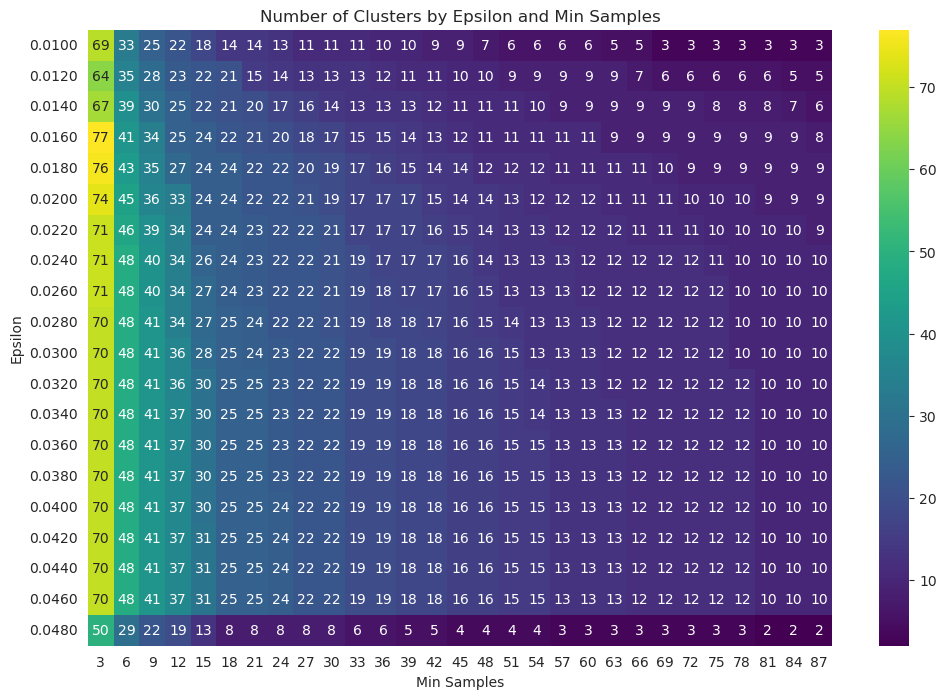

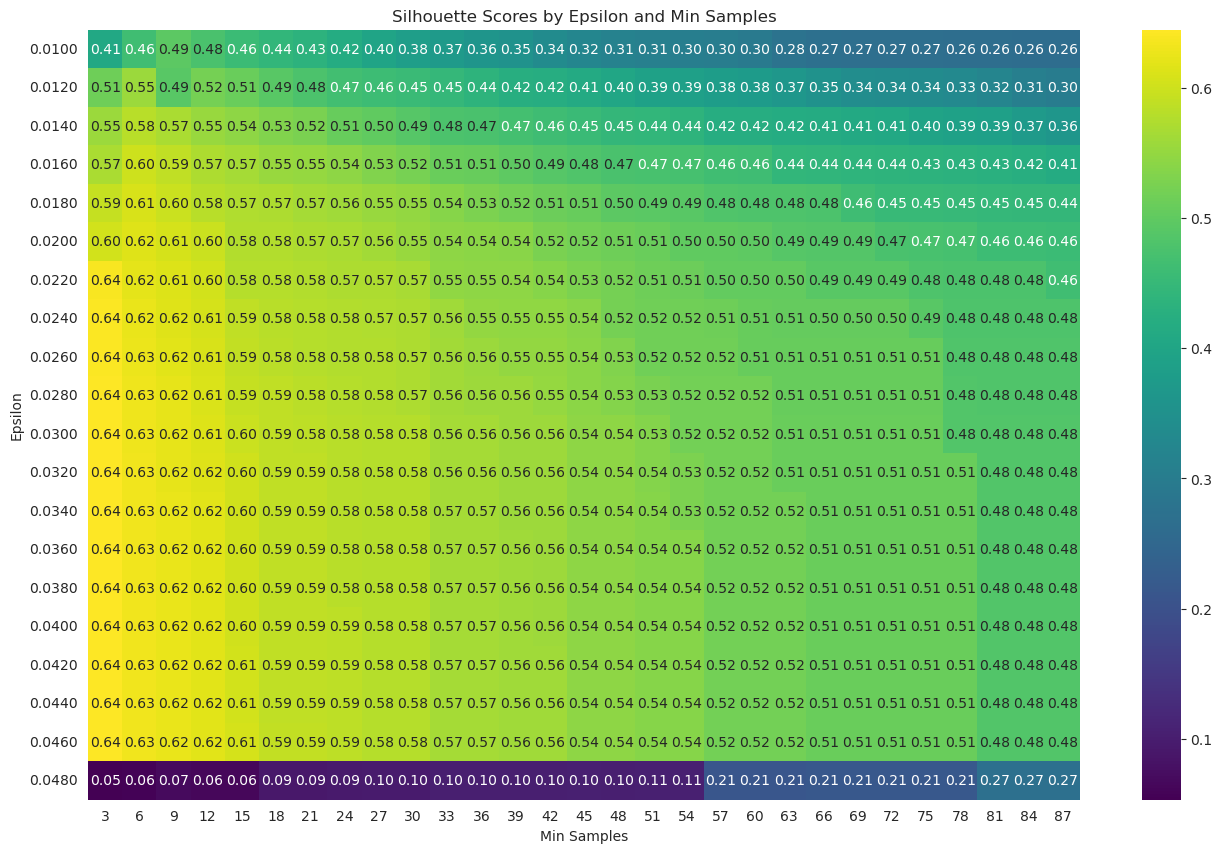

In [24]:
## plotting the 2 heatmaps:

print("Number of clusters:\n", num_clusters)
print("Silhouette scores:\n", silhouettes)
df_clusters = pd.DataFrame(num_clusters, index=epsilons, columns=min_samples_s)
plt.figure(figsize=(12, 8))
sns.heatmap(df_clusters, cmap='viridis', annot=True, fmt='d', cbar=True)
plt.title('Number of clusters by epsilon and min_samples')
plt.xlabel('min_sample')
plt.ylabel('epsilon')
plt.yticks(ticks=np.arange(len(epsilons)) + 0.5, labels=[f'{y:.4f}' for y in epsilons])
plt.show()

# Plotting silhouette scores (optional)
df_silhouettes = pd.DataFrame(silhouettes, index=epsilons, columns=min_samples_s)
plt.figure(figsize=(16, 10))
sns.heatmap(df_silhouettes, cmap='viridis', annot=True, fmt='.2f', cbar=True)
plt.title('Silhouette scores by epsilon and min_samples')
plt.xlabel('min_sample')
plt.ylabel('epsilon')
plt.yticks(ticks=np.arange(len(epsilons)) + 0.5, labels=[f'{y:.4f}' for y in epsilons])
plt.show()

In [21]:
df_clusters = pd.DataFrame(num_clusters, columns=min_samples_s, index=epsilons)
df_silhouettes = pd.DataFrame(silhouettes, columns=min_samples_s, index=epsilons)

In [94]:
dbscan = DBSCAN(eps=0.04, min_samples= 16, metric='precomputed')
labels = dbscan.fit_predict(distance_matrix)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7200 samples in 0.000s...
[t-SNE] Computed neighbors for 7200 samples in 0.146s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7200
[t-SNE] Computed conditional probabilities for sample 2000 / 7200
[t-SNE] Computed conditional probabilities for sample 3000 / 7200
[t-SNE] Computed conditional probabilities for sample 4000 / 7200
[t-SNE] Computed conditional probabilities for sample 5000 / 7200
[t-SNE] Computed conditional probabilities for sample 6000 / 7200
[t-SNE] Computed conditional probabilities for sample 7000 / 7200
[t-SNE] Computed conditional probabilities for sample 7200 / 7200
[t-SNE] Mean sigma: 0.035785
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.327164
[t-SNE] KL divergence after 1000 iterations: 0.905709


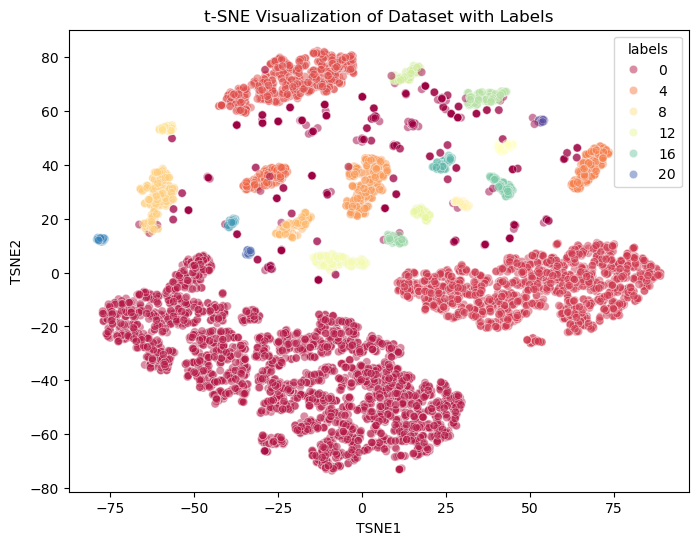

In [95]:
utils.plot_TSNE(df , labels)